<a href="https://colab.research.google.com/github/sameersahu473/rp/blob/main/ambient_data1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from scipy.misc import face
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
dt1 = pd.read_csv("ambient_data.csv")
dt2 = pd.read_csv("ambient_clean.csv")

In [8]:
dt1.head()

,noise signal
0,-0.8381
1,-2.4874
2,-2.4827
3,-1.6764
4,-2.0117


In [9]:
noise = dt1["noise signal"]

clean = dt2["clean signal"]

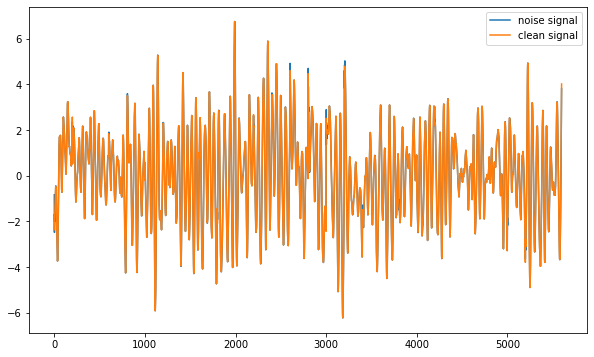

In [10]:


plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')

plt.legend(loc='best')
plt.show()


Using weiner filter


In [11]:
!pip install astroML
from astroML.filters import wiener_filter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 27.2 MB/s 


https://www.astroml.org/book_figures_1ed/chapter10/fig_wiener_filter.html

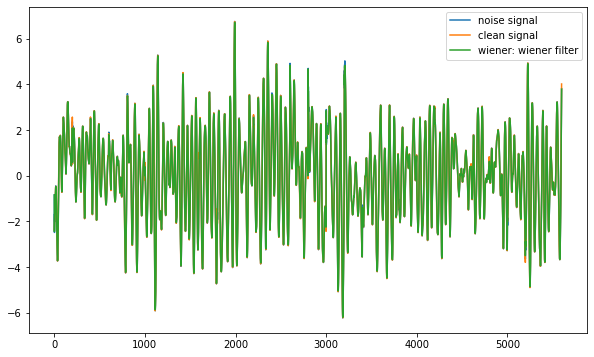

In [13]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')
plt.plot(signal.wiener(noise), label='wiener: wiener filter')

plt.legend(loc='best')
plt.show()

In [14]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, signal.wiener(noise)))

In [15]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,signal.wiener(noise)))

0.02310111884943837


In [16]:
len(noise)

5600

In [17]:
noise_train = noise[:5000]
noise_test = noise[5000:]

clean_train = clean[:5000]
clean_test = clean[5000:]

using knn regressor

In [18]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=100, weights='uniform')

In [19]:
clf.fit(noise_train.values.reshape(-1,1), clean_train)

KNeighborsRegressor(n_neighbors=100)

In [20]:
clean_pred = clf.predict(noise_test.values.reshape(-1,1))

In [21]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean_test, clean_pred))

In [23]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

In [24]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))


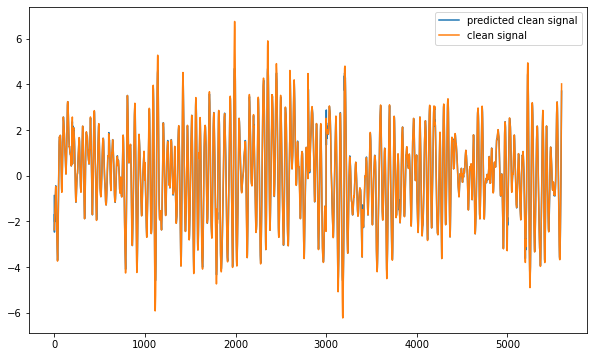

In [25]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [27]:
print(metrics.mean_squared_error(clean,clean_pred))

0.036660429722005776


In [28]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [29]:
regressor.fit(noise_train.values.reshape(-1,1), clean_train)

[08:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse')

In [30]:
clean_pred = regressor.predict(noise.values.reshape(-1,1))

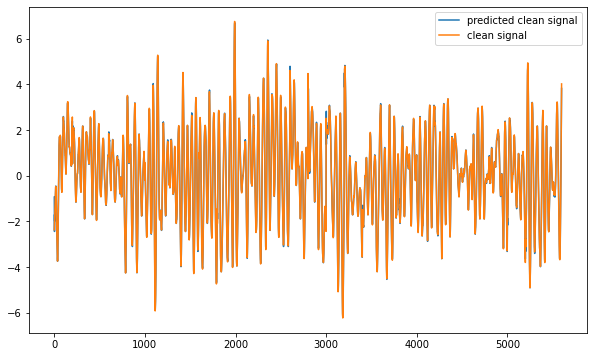

In [31]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [32]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,clean_pred))

0.020733397494758582


In [33]:
result_df = pd.DataFrame(clean_pred, columns = ['predicted'])

In [34]:
result_df.to_csv('ambient_pred.csv')